**Exploratory Data Analysis** <br>
The exploratory analysis aims to assess whether a customer’s product category choice can be predicted using demographic attributes (age and gender) and behavioral indicators derived from transaction history. The dataset consists of 1,000 retail transactions with complete demographic, product, and purchase information, allowing for a comprehensive exploratory assessment.

In [68]:
#Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
#Load the cleaned dataset

df = pd.read_csv("../data/processed/retail_sales_dataset_cleaned.csv")
df.head()

,transaction_id,date,customer_id,gender,age,product_category,quantity,price_per_unit,total_amount,year,month,month_name,weekday
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,2023,11,Nov,Friday
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,2023,2,Feb,Monday
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,2023,1,Jan,Friday
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,2023,5,May,Sunday
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,2023,5,May,Saturday


In [70]:
df.info()   #Check data types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   transaction_id    1000 non-null   int64 
 1   date              1000 non-null   object
 2   customer_id       1000 non-null   object
 3   gender            1000 non-null   object
 4   age               1000 non-null   int64 
 5   product_category  1000 non-null   object
 6   quantity          1000 non-null   int64 
 7   price_per_unit    1000 non-null   int64 
 8   total_amount      1000 non-null   int64 
 9   year              1000 non-null   int64 
 10  month             1000 non-null   int64 
 11  month_name        1000 non-null   object
 12  weekday           1000 non-null   object
dtypes: int64(7), object(6)
memory usage: 101.7+ KB


In [71]:
# Understanding the purchase history of customers by counting the number of purchases each customer has made

purchase_count = (
    df.groupby('customer_id')
      .size()
      .reset_index(name='purchase_count')
)

df = df.merge(purchase_count, on='customer_id', how='left')

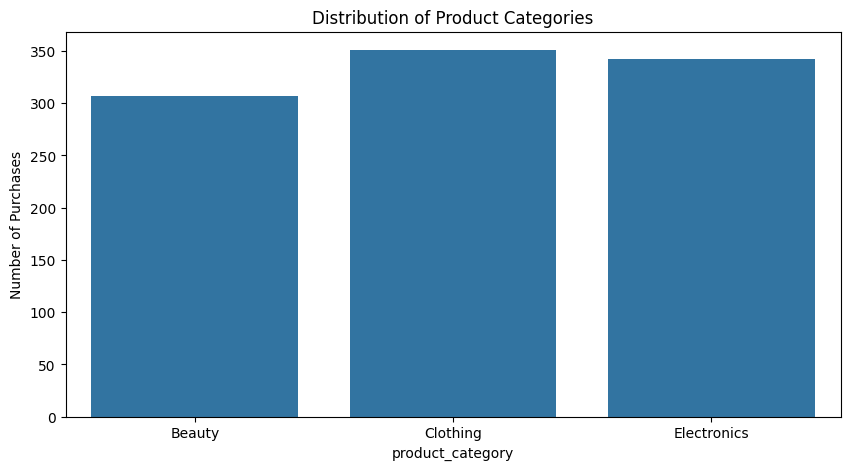

In [72]:
#Understanding the Target Variable: Product Category

plt.figure(figsize=(10,5))
sns.countplot(data=df, x="product_category")
plt.title("Distribution of Product Categories")
plt.ylabel("Number of Purchases")
plt.show()

**Product Category Distribution**

The distribution of product categories indicates that while some categories are more frequently purchased than others, no single category overwhelmingly dominates the dataset. This suggests that the classification problem is viable, though potential class imbalance should be considered during modeling.

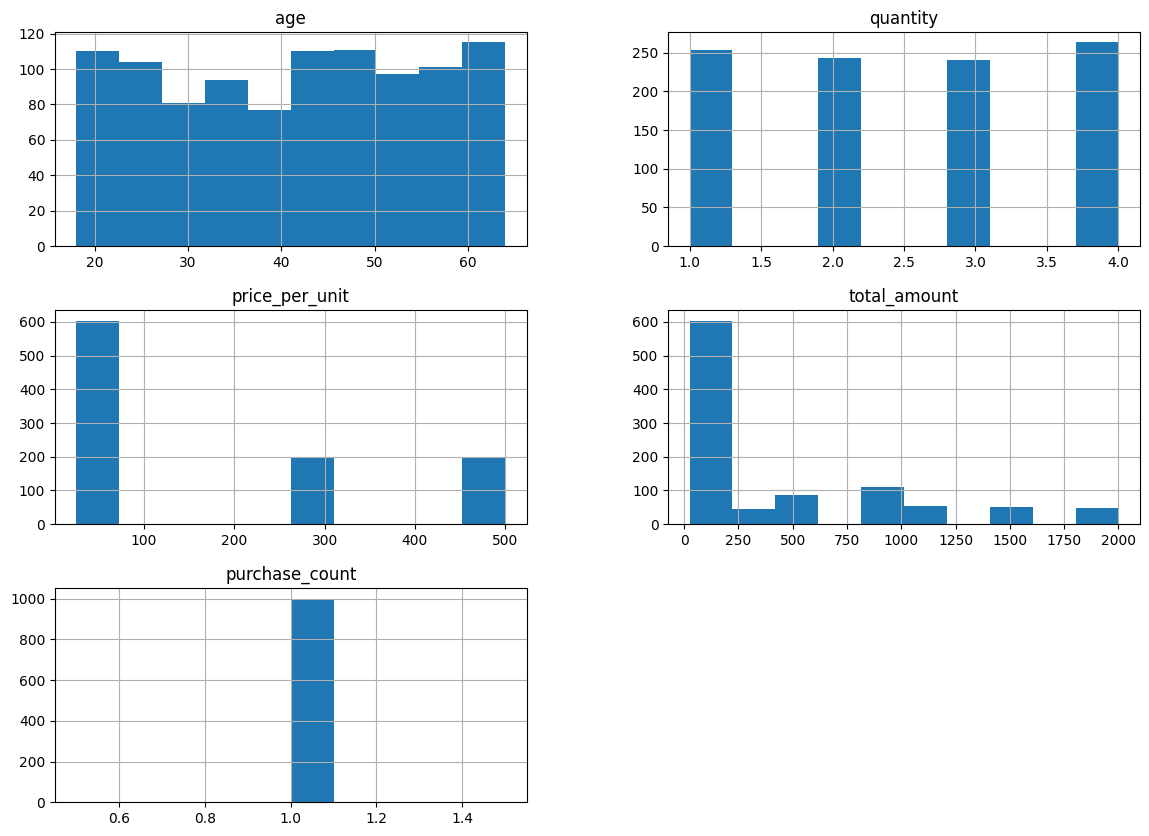

In [73]:
#Distribution of predictors

df[['age', 'quantity', 'price_per_unit', 'total_amount', 'purchase_count']].hist(
    figsize=(14,10), bins=10
)
plt.show()

**Histograms of the predictor variables** 

Age exhibits a relatively symmetric distribution, suggesting stable demographic coverage across all age groups.
Quantity distribution illustrate that most customers purchased 3 or less items. However, a small number of customers purchased higher number of products.
Price_per_unit distribution shows that majority of the customers purchased low value products (below 100) while a small number of customers purchased more expensive, or very expensive items. 
Total_amount distribution is in line with the price_per_unit and purchase history distributions with a vast majority (60 percent) have lower total spending and a smaller number spending more.
These distributional patterns suggest that behavioral variables carry stronger predictive signal than demographics, though scaling or transformation may be required for modeling.


Examination of customer_id frequency through purchase_count revealed that each transaction corresponds to a unique customer. As a result, no repeat purchase history is available in the dataset, and a derived purchase_count feature does not provide additional predictive value.

In [74]:
#check number of unique customers

print("Total rows:", len(df))
print("Unique customers:", df['customer_id'].nunique())

Total rows: 1000
Unique customers: 1000


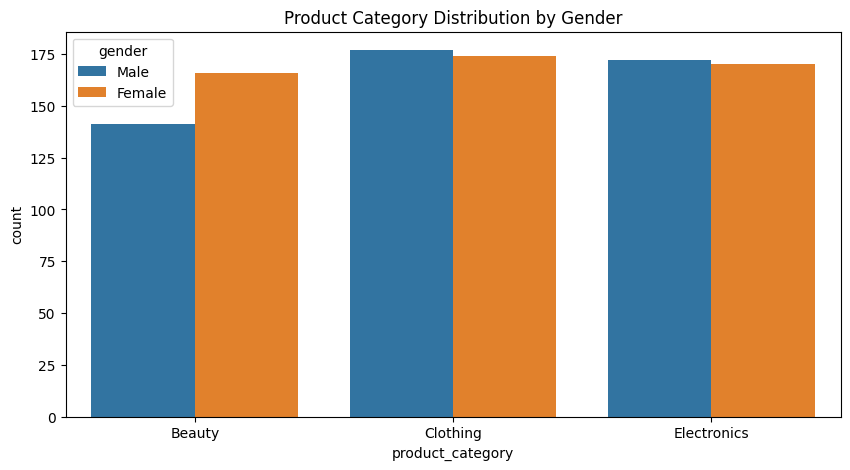

In [75]:
#Gender vs Product Category

plt.figure(figsize=(10,5))
sns.countplot(data=df, x='product_category', hue='gender')
plt.title('Product Category Distribution by Gender')
plt.show()

**Gender and Purchase Behavior**

Analysis of product category distribution by gender reveals moderate but meaningful differences in purchasing patterns. 

Beauty purchases show a clear female skew, indicating predictive signal.
Clothing and Electronics are nearly gender-balanced.

Overall, Gender improves prediction for certain categories but cannot independently determine product choice. Therefore, gender shall be treated as a complementary predictor to enhance model performance when combined with behavioral features such as spending and quantity purchased.

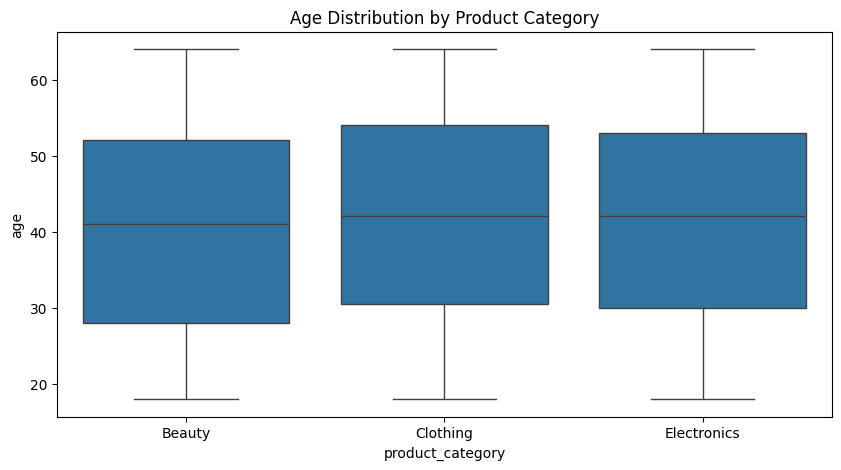

In [76]:
#Age distribution by Product Category

plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='product_category', y='age')
plt.title('Age Distribution by Product Category')
plt.show()

**Age Distribution by Product Category**
The age distribution across product categories shows broadly similar patterns, with moderate differences in central tendency and spread.

All product categories span a wide and overlapping age range.
Beauty purchases skew slightly younger compared to Clothing and Electronics.
Clothing and Electronics show nearly identical age distributions.
Age provides modest predictive value but is insufficient as a standalone predictor.

Overall, age contributes contextual information that may improve classification performance when combined with other demographic and transactional features.

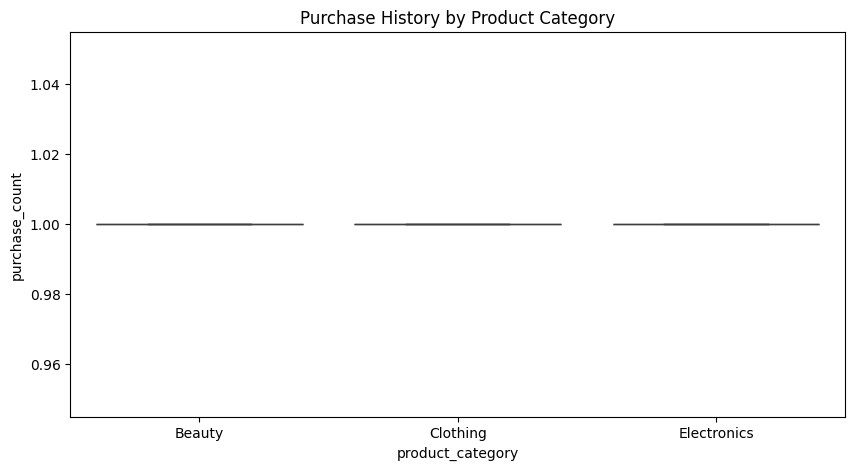

In [77]:
#Purchase history by product category

plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='product_category', y='purchase_count')
plt.title('Purchase History by Product Category')
plt.show()

**Purchase History by Product Category**

The box plot confirms that the dataset does not contain repeat purchse behavior across all product categories.

All product categories show identical purchase counts.
Each customer appears exactly once in the dataset.
No repeat purchase history is available.

Therefore, purchase history cannot be used as a meaningful predictor of product category and should be excluded from subsequent modeling.

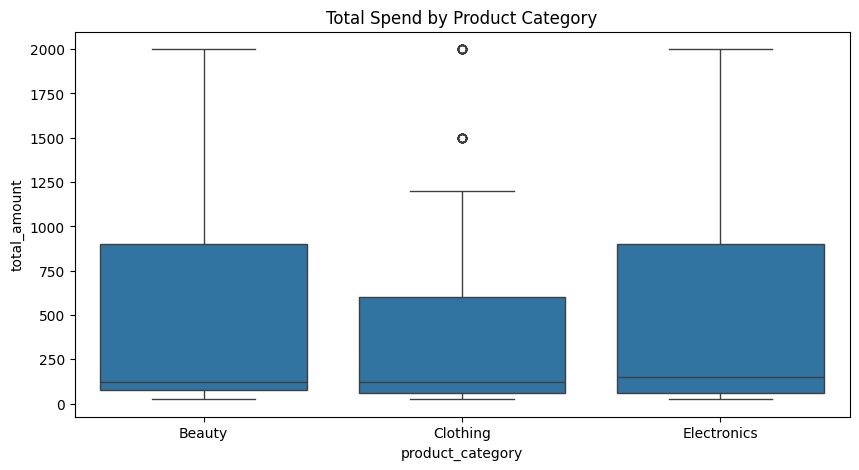

In [78]:
#Spending behavior by product category

plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='product_category', y='total_amount')
plt.title('Total Spend by Product Category')
plt.show()

**Total Spend by Product Category**

The distribution of total transaction amount varies meaningfully across product categories, indicating differences in spending behavior.

Electronics shows the highest variability in total spend suggesting that electronics purchases include a larger proportion of high-value transactions, likely driven by higher unit prices or larger quantities.
Beauty transactions tend to be lower and more tightly clustered.
Clothing shows moderate spending with occasional high-value outliers.

Overall, total spend provides strong discriminatory signal across product categories. The differences in spread suggest that transaction amount is a valuable predictor for distinguishing between categories, particularly for identifying Electronics purchases.

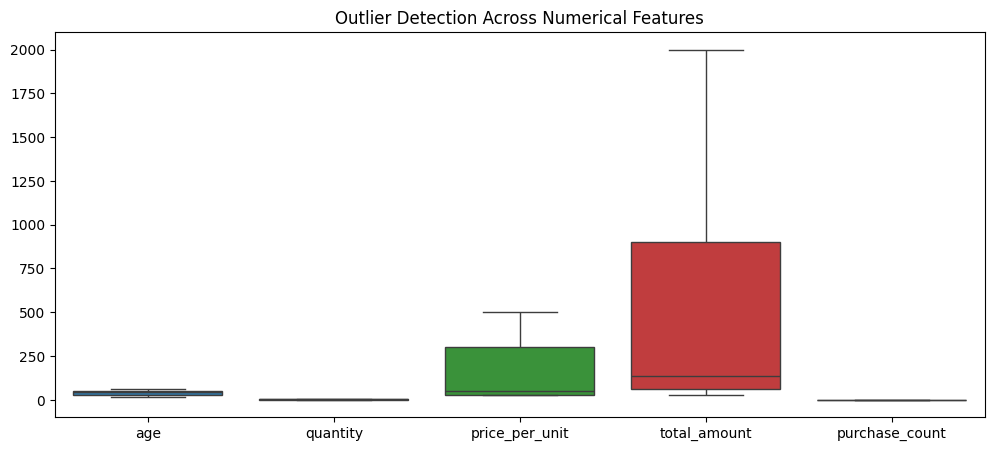

In [79]:
#Outliers

plt.figure(figsize=(12,5))
sns.boxplot(data=df[['age', 'quantity', 'price_per_unit', 'total_amount', 'purchase_count']])
plt.title('Outlier Detection Across Numerical Features')
plt.show()

**Outlier Detection Across Features**

Outlier analysis across numerical variables reveals distinct distributional characteristics for each feature.

Age and quantity show stable distributions with no extreme outliers indicating that they are unlikely to introduce noise or instability in the predictive models. 
Price per unit has a small number of higher-value but plausible observations.
Total amount exhibits significant right skew with valid high-value transactions.
Purchase count has no variability and provides no predictive value.

Overall, most numerical variables are well-behaved. However, total transaction amount requires careful treatment during modeling.


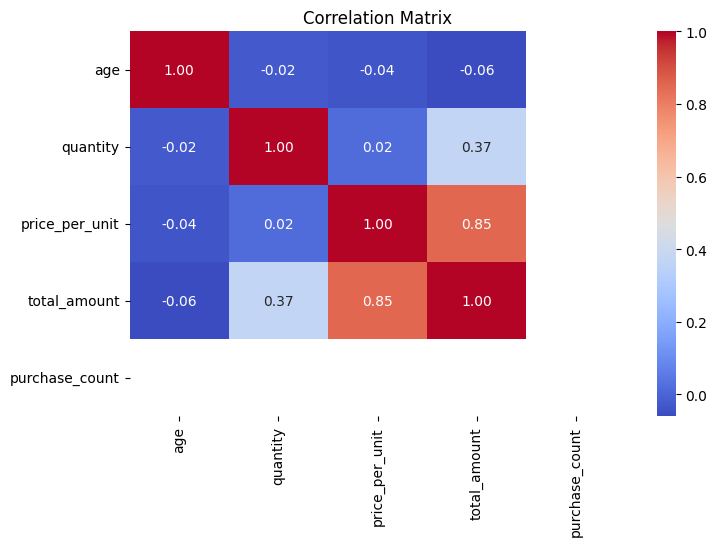

In [80]:
#Correlation analysis

numeric_cols = ['age', 'quantity', 'price_per_unit', 'total_amount', 'purchase_count']
corr = df[numeric_cols].corr()

plt.figure(figsize=(8,5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

**Correlation Matrix**

The correlation matrix highlights the relationships among key numerical predictors and provides insight into potential redundancy and multicollinearity. Overall, most variables exhibit low to moderate correlation, with one exception.

Age is weakly correlated with all spending variables, providing independent demographic signal.
Quantity shows moderate correlation with total spend, reflecting purchasing intensity.
Price per unit is strongly correlated with total amount, indicating potential multicollinearity.
Purchase count provides no usable signal due to zero variance.

The strong correlation between price per unit and total transaction amount suggests that including both variables in a predictive model may introduce redundancy.

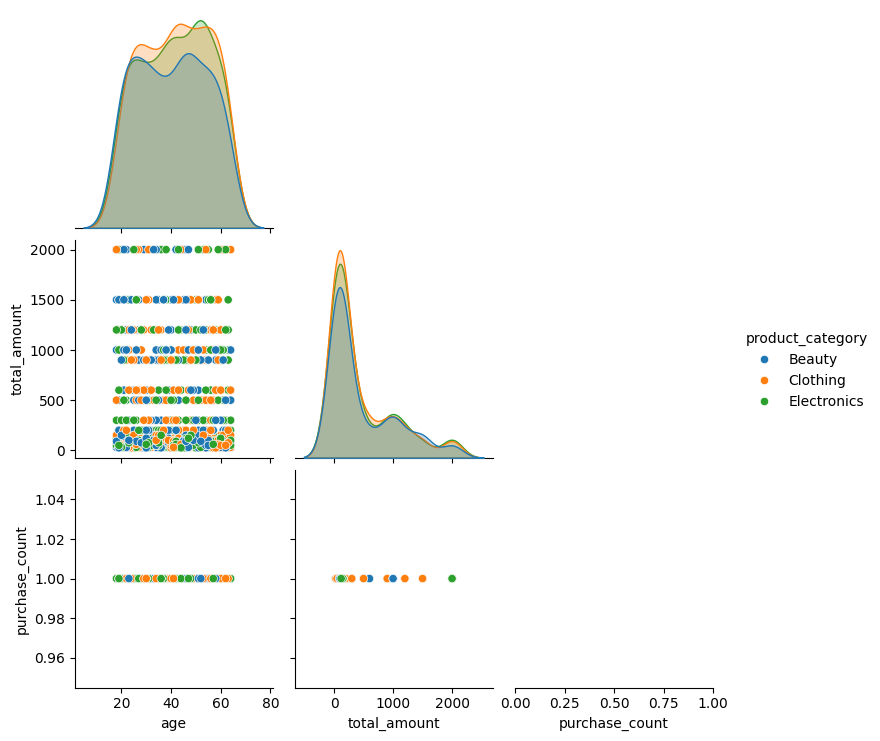

In [81]:
#Pattern exploration with pairplot

sns.pairplot(
    df,
    vars=['age', 'total_amount', 'purchase_count'],
    hue='product_category',
    corner=True
)
plt.show()

**Pairwise Relationships between Key Predictors and Product Category**

The pairplot visualizes pairwise relationships among age, total transaction amount, and purchase count, with observations colored by product category. This visualization provides insight into how well these variables separate product categories and whether natural clustering exists.

No strong natural clustering exists between product categories based on age and transaction amount alone.
Product categories overlap substantially across all examined numerical dimensions.
Category distinctions appear subtle and probabilistic rather than deterministic.

The absence of clear separability suggests that predicting product category will require combining multiple features, including demographic variables such as age, categorical features such as gender, and transactional indicators such as spending behavior.

Single predictors are insufficient on their own, reinforcing the need for multivariate models rather than rule-based classification.

**Conclusion**

Based on the exploratory data analysis, it is possible to predict the product category a customer is likely to purchase based on their age, gender, and previous purchase history but with important limitations.

The analysis shows that age, gender, and transactional features provide useful but not definitive predictive signals. None of the individual predictors fully separate product categories on their own. However, when combined, they contribute meaningful information that can support probabilistic classification.

The prediction accuracy will be constrained by:
    Absence of repeated purchase history
    Limited behavioral depth at the customer level
    Overlapping feature distribution across categories. 

Considering all of the above, the variables can inform a model to estimate the likelihood of a customer purchasing a specific product category, but predictions should be interpreted probabilistically rather than as absolute outcomes.

For future, richer behavioral data or incorporating customer level purchase sequences can significantly enhance predictive performance. 